In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Dataframe preparation

1. Drop unnamed column
2. Convert time to date-time format

In [70]:
df_original = pd.read_csv('dataset_mood_smartphone.csv')

# Columns: ['Unnamed: 0', 'id', 'time', 'variable', 'value']
df_original = df_original.drop(columns = 'Unnamed: 0') # Drop the first column (unnamed)
df_original['time'] = pd.to_datetime(df_original['time'], format="%Y-%m-%d %H:%M:%S") # Convert time to datetime

# Set variables to be used
ids = df_original.id.unique()


We set variables for using later

In [88]:
variables = df_original.variable.unique()
score_variables = variables[:4] # Patient score variables: mood, circumplex.arousal, circumplex.valence, activity
usage_variables = variables[4:] # Usage variables: screen, call, sms, appCat's variables
ids = df_original.id.unique() # Get all patient ids
dates = pd.date_range(start=df_original.time.min().round("D"), end=df_original.time.max().round("D")) # Get all dates from 2014-02-17 to 2014-06-09
new_index = pd.MultiIndex.from_product([df_original.id.unique(),dates], names = ["id", "time"]) # Create a new index with all combinations of ids and dates

## New dataframe view



In [283]:
df_new = pd.DataFrame(np.nan, index = new_index, columns = variables) 

for patient_id in ids:
    row = df_original[df_original.id == patient_id] 
    row.index = row.time
    
    for var in score_variables:
        sub_df = row[row.variable == var].value.resample('D').mean() # resample to daily and take mean
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for date in used_dates:
            df_new.loc[patient_id, var].loc[date] = sub_df[date] # update the new dataframe with the mean values
            
    for var in usage_variables:
        sub_df = row[row.variable == var].value.resample('D').mean() # resample to daily and take mean
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for date in used_dates:
            df_new.loc[patient_id, var].loc[date] = sub_df[date] # update the new dataframe with the mean values
            
    print(patient_id)

AS14.01
AS14.02
AS14.03
AS14.05
AS14.06
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
AS14.15
AS14.16
AS14.17
AS14.19
AS14.20
AS14.23
AS14.24
AS14.25
AS14.26
AS14.27
AS14.28
AS14.29
AS14.30
AS14.31
AS14.32
AS14.33


In [284]:
df_new['day_id'] = np.nan # Add a new column to the dataframe to store the day id
count = 0
for i in ids:
    day_id = 0
    for d in dates: # Iterate through all dates 
        day_id +=1
        df_new['day_id'][count] = day_id
        count += 1

In [285]:
df_new

mood  circumplex.arousal  circumplex.valence  activity  \
id      time                                                                 
AS14.01 2014-02-17   NaN                 NaN                 NaN       NaN   
        2014-02-18   NaN                 NaN                 NaN       NaN   
        2014-02-19   NaN                 NaN                 NaN       NaN   
        2014-02-20   NaN                 NaN                 NaN       NaN   
        2014-02-21   NaN                 NaN                 NaN       NaN   
...                  ...                 ...                 ...       ...   
AS14.33 2014-06-05   NaN                 NaN                 NaN       NaN   
        2014-06-06   NaN                 NaN                 NaN       NaN   
        2014-06-07   NaN                 NaN                 NaN       NaN   
        2014-06-08   NaN                 NaN                 NaN       NaN   
        2014-06-09   NaN                 NaN                 NaN       NaN   

                    screen  call  sms  appCat.builtin  appCat.communication  \
id      time                                                                  
AS14.01 2014-02-17     NaN   1.0  NaN             NaN                   NaN   
        2014-02-18     NaN   1.0  NaN             NaN                   NaN   
        2014-02-19     NaN   1.0  1.0             NaN                   NaN   
        2014-02-20     NaN   1.0  1.0             NaN                   NaN   
        2014-02-21     NaN   NaN  1.0             NaN                   NaN   
...                    ...   ...  ...             ...                   ...   
AS14.33 2014-06-05     NaN   NaN  NaN             NaN                   NaN   
        2014-06-06     NaN   NaN  NaN             NaN                   NaN   
        2014-06-07     NaN   NaN  NaN             NaN                   NaN   
        2014-06-08     NaN   NaN  NaN             NaN                   NaN   
        2014-06-09     NaN   NaN  NaN             NaN                   NaN   

                    appCat.entertainment  appCat.finance  appCat.game  \
id      time                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   
...                                  ...             ...          ...   
AS14.33 2014-06-05                   NaN             NaN          NaN   
        2014-06-06                   NaN             NaN          NaN   
        2014-06-07                   NaN             NaN          NaN   
        2014-06-08                   NaN             NaN          NaN   
        2014-06-09                   NaN             NaN          NaN   

                    appCat.office  appCat.other  appCat.social  appCat.travel  \
id      time                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
AS14.33 2014-06-05            NaN           NaN            NaN            NaN   
        2014-06-06            NaN           NaN            NaN            NaN   
        2014-06-07            NaN           NaN            NaN            NaN   
        2014-06-08            NaN           NaN            NaN            NaN   
        2014-06-09            NaN           NaN        

## Explore dataset (1A)

**how many records are there, how many attributes, what kinds of attributes are there, ranges of values, distribution of values, relationships between attributes, missing values, and so on.**

In [192]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        376912 non-null  object        
 1   time      376912 non-null  datetime64[ns]
 2   variable  376912 non-null  object        
 3   value     376710 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 11.5+ MB


In [286]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3051 entries, ('AS14.01', Timestamp('2014-02-17 00:00:00', freq='D')) to ('AS14.33', Timestamp('2014-06-09 00:00:00', freq='D'))
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mood                  1268 non-null   float64
 1   circumplex.arousal    1268 non-null   float64
 2   circumplex.valence    1266 non-null   float64
 3   activity              1188 non-null   float64
 4   screen                1207 non-null   float64
 5   call                  1338 non-null   float64
 6   sms                   734 non-null    float64
 7   appCat.builtin        1195 non-null   float64
 8   appCat.communication  1183 non-null   float64
 9   appCat.entertainment  850 non-null    float64
 10  appCat.finance        207 non-null    float64
 11  appCat.game           193 non-null    float64
 12  appCat.office         276 non-null    float64
 13  appCat.other      

In [109]:
df_original.groupby('variable')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
activity,22965.0,0.115958,0.186946,0.000,0.00000,0.021739,0.158333,1.000
appCat.builtin,91288.0,18.538262,415.989243,-82798.871,2.02000,4.038000,9.922000,33960.246
appCat.communication,74276.0,43.343792,128.912750,0.006,5.21800,16.225500,45.475750,9830.777
appCat.entertainment,27125.0,37.576480,262.960476,-0.011,1.33400,3.391000,14.922000,32148.677
appCat.finance,939.0,21.755251,39.218361,0.131,4.07200,8.026000,20.155000,355.513
appCat.game,813.0,128.391615,327.145246,1.003,14.14800,43.168000,123.625000,5491.793
appCat.office,5642.0,22.578892,449.601382,0.003,2.00400,3.106000,8.043750,32708.818
appCat.other,7650.0,25.810839,112.781355,0.014,7.01900,10.028000,16.829250,3892.038
appCat.social,19145.0,72.401906,261.551846,0.094,9.03000,28.466000,75.372000,30000.906


In [287]:
df_new.describe()

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,day_id
count,1268.000000,1268.000000,1266.000000,1188.000000,1207.000000,1338.0,734.0,1195.000000,1183.000000,850.000000,207.000000,193.000000,276.000000,1120.000000,988.000000,429.000000,264.000000,433.000000,113.000000,3051.00000
mean,6.990063,-0.103851,0.687112,0.120003,84.004342,1.0,1.0,25.076675,45.498456,94.665520,25.664965,156.057124,42.614881,21.479152,76.848889,52.768936,63.136312,17.351448,21.553481,57.00000
std,0.736465,0.662715,0.434602,0.098301,70.113351,0.0,0.0,79.059608,36.902552,148.204684,24.707236,256.227701,105.578637,40.505653,140.408015,98.087529,169.998827,31.478982,20.750719,32.62436
min,3.000000,-2.000000,-1.250000,0.000000,0.462000,1.0,1.0,-772.768558,1.095000,1.014000,1.004000,1.010000,0.044000,2.007000,0.725000,0.080000,0.111000,1.002000,1.007000,1.00000
25%,6.600000,-0.600000,0.400000,0.054872,44.920734,1.0,1.0,7.977571,27.142218,15.931885,8.867354,30.036571,6.679625,9.063450,31.390375,22.850333,12.828125,4.684000,9.393667,29.00000
50%,7.000000,0.000000,0.800000,0.095634,65.307625,1.0,1.0,12.535062,38.598403,47.289179,17.149000,59.937667,17.065125,12.051500,54.075359,37.994000,25.623857,9.065000,16.795000,57.00000
75%,7.500000,0.400000,1.000000,0.149358,97.565377,1.0,1.0,21.143343,52.594775,111.764744,32.235667,183.659667,40.523500,18.508375,91.634626,59.765000,48.554021,19.125000,26.735000,85.00000
max,9.333333,2.000000,2.000000,0.566171,960.503111,1.0,1.0,1399.054714,522.718000,1650.744000,149.181000,2562.907000,1494.864000,722.752200,3759.177625,1758.019333,2239.937000,363.429000,183.468500,113.00000


NOTE: appCat.builtin duration has to be positive. Remove 1 negative appCat.builtin value

In [288]:
count=0
for id in range(len(df_new)):
    if df_new['appCat.builtin'][id]<0:
        print(df_new['appCat.builtin'][id])
        count+=1
        df_new['appCat.builtin'][id]=np.nan
print('Removed',count,'appCat.builtin negative values')

-772.7685576923076
Removed 1 appCat.builtin negative values


<AxesSubplot: title={'center': 'Variable Counts'}>

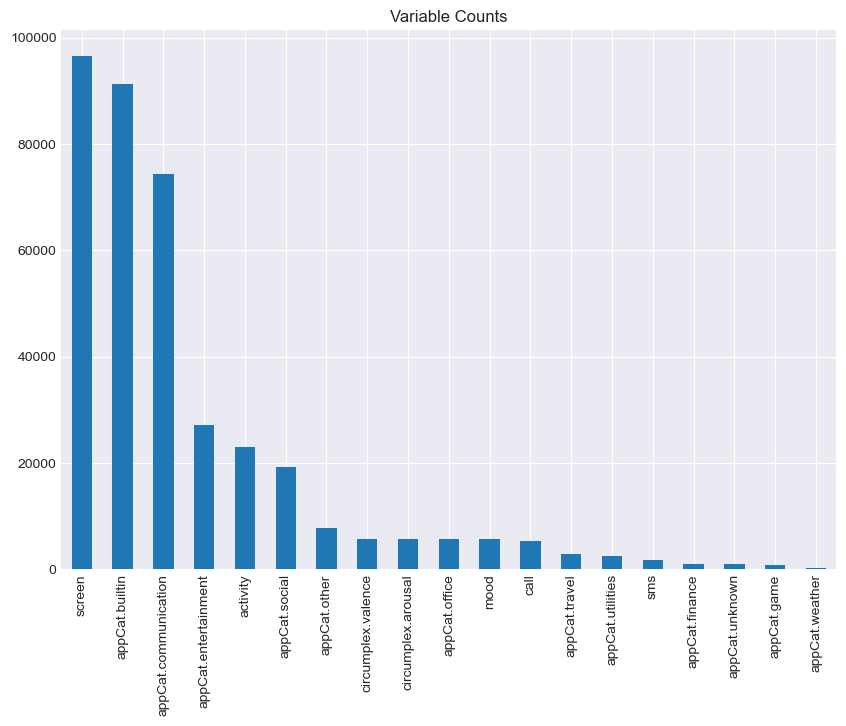

In [104]:
df_original.variable.value_counts().plot.bar(title="Variable Counts", legend=None,figsize=(10,7)) # original dataframe, with multiple inputs of a same attribute in a day

<AxesSubplot: title={'center': 'Variable Counts'}>

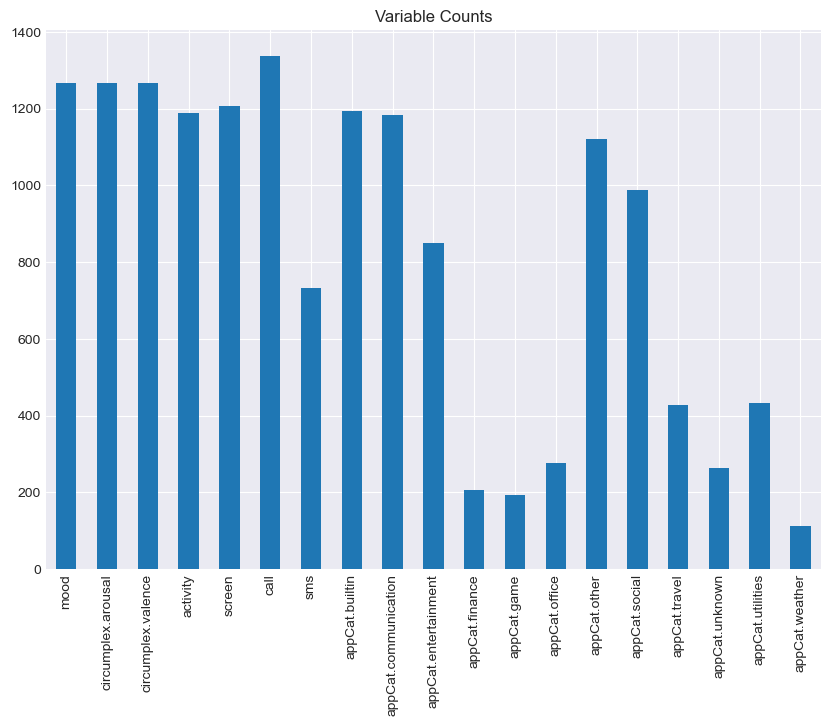

In [289]:
df_new.drop(['day_id'], axis=1).count().plot.bar(title="Variable Counts", legend=None,figsize=(10,7))

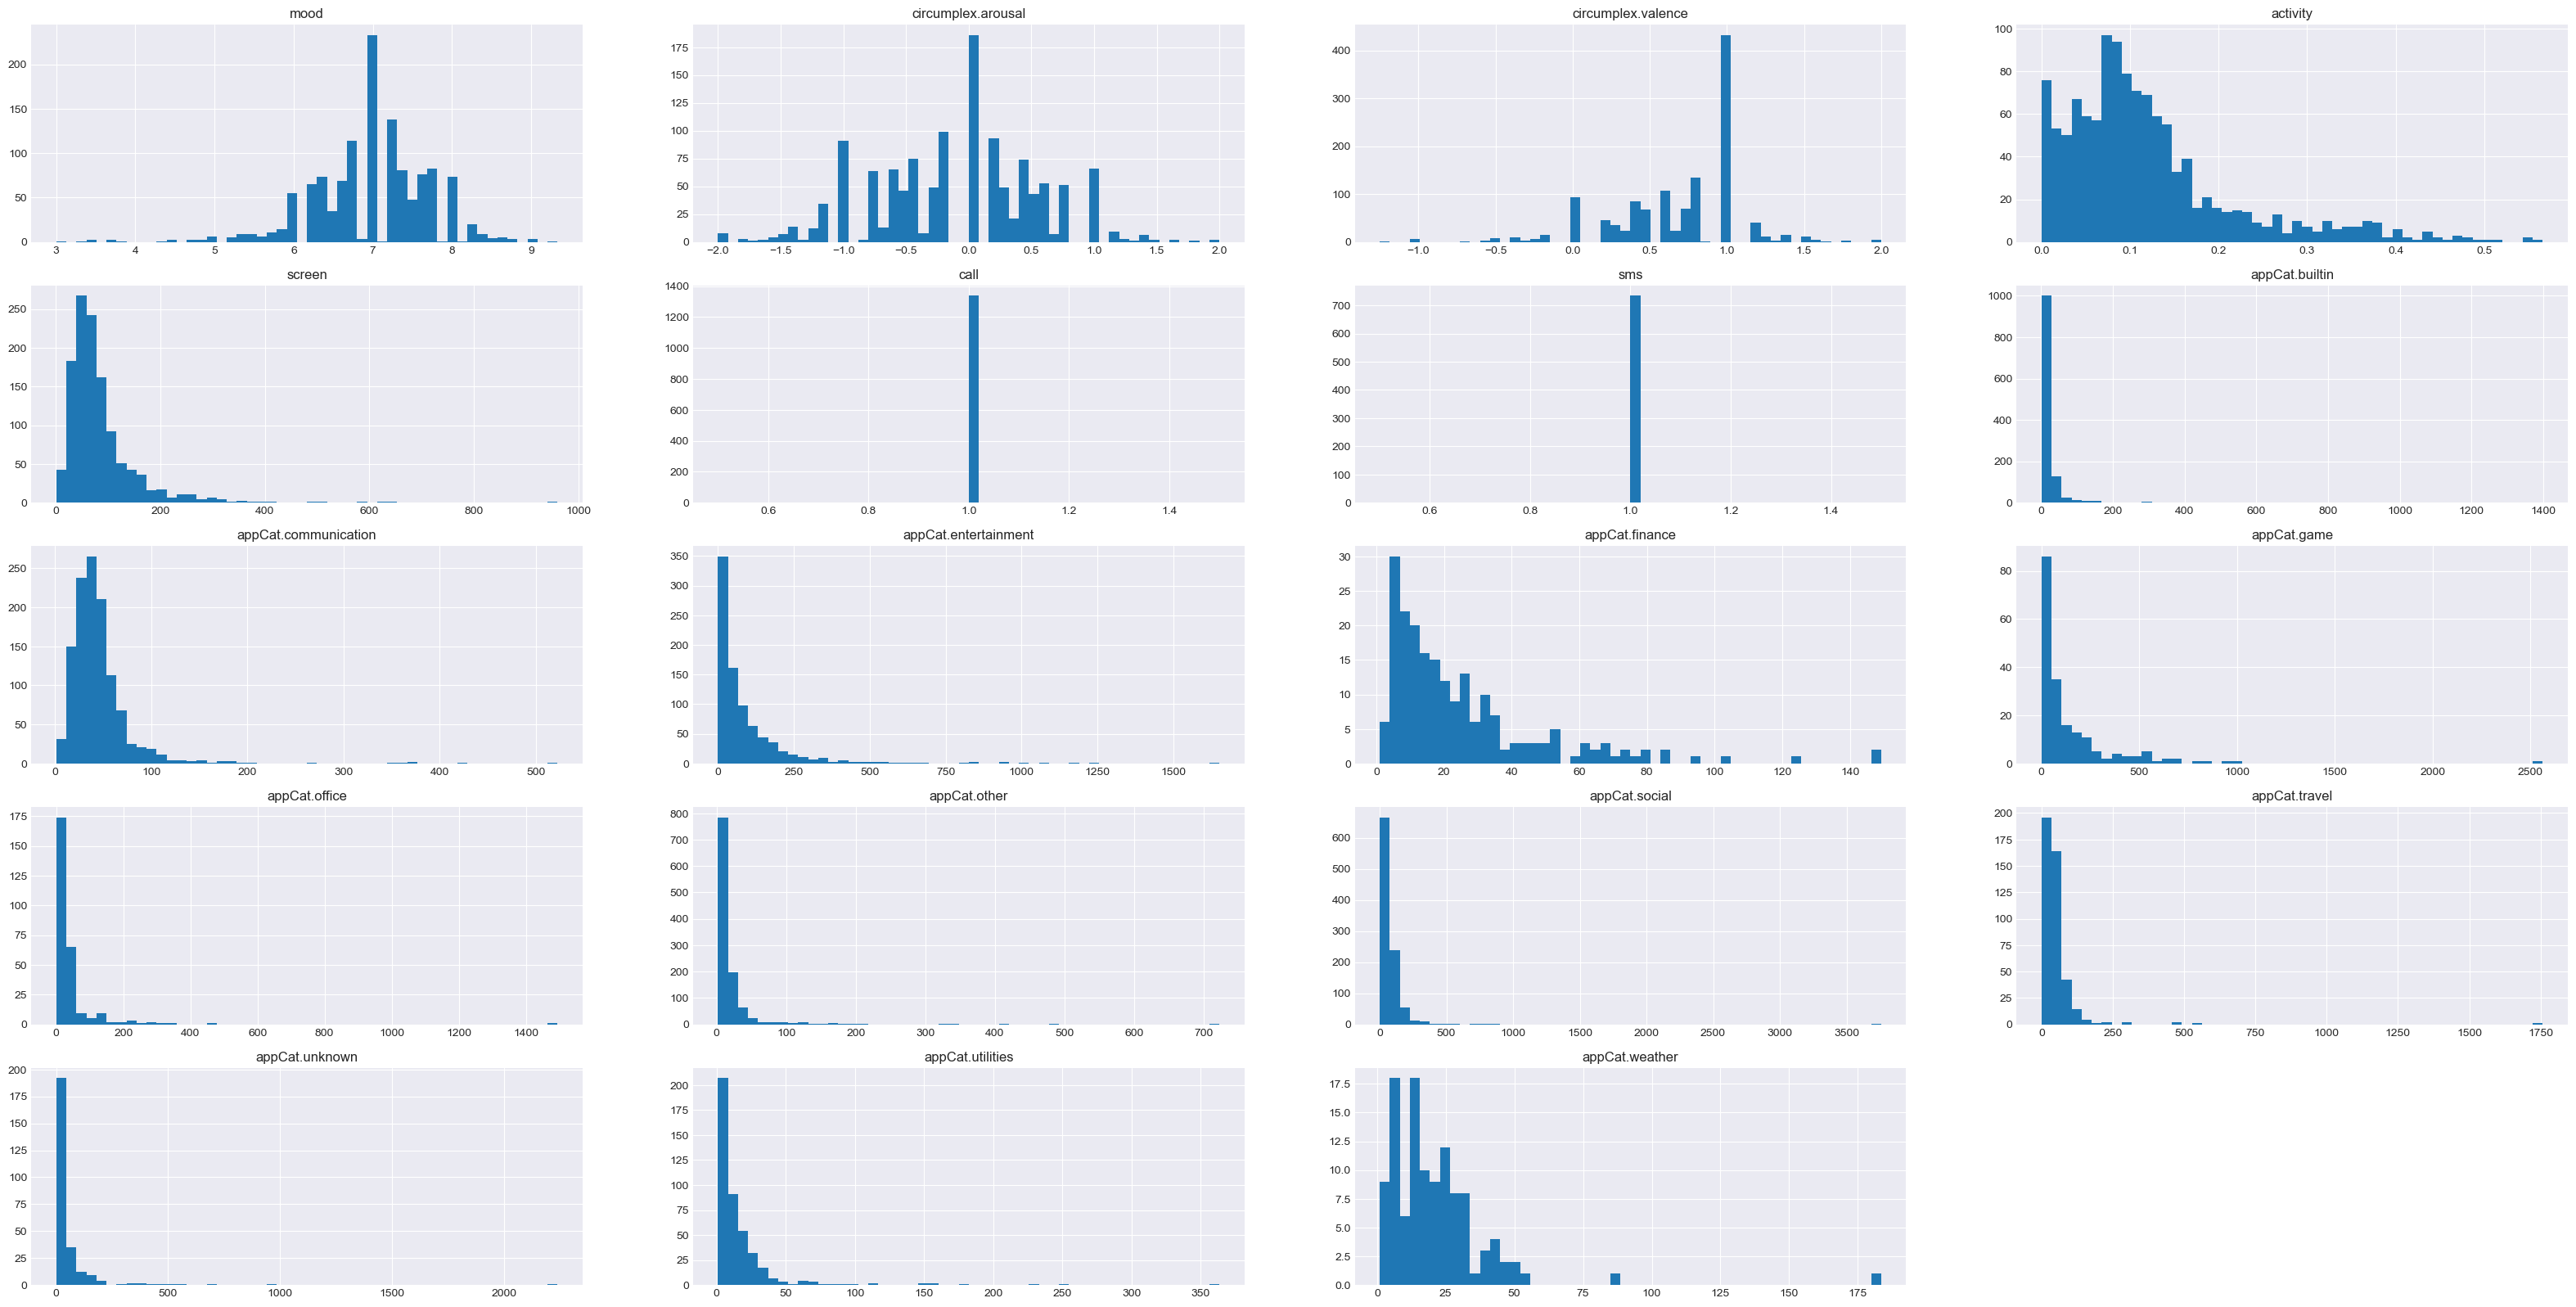

In [293]:
count = 1
f= plt.figure(figsize=(40, 20))
for var in list(variables):
    ax = f.add_subplot(5,4,count)
    a = np.asarray(df_new[var])
    ax.hist(a, bins=50)
    ax.set_title(var)
    count+=1

### Correlation matrix


## Clean dataset (1B)

- Remove extreme and incorrect values (outlier)
- Impute the missing values with two approaches: worst-case, mean, first-quartile value of properties with similar characteristics or entire set 
- The advanced dataset contains a number of time series, select approaches to impute missing values that are logical for such time series. Also consider what to do with prolonged periods of missing data in a time series.

Current approach: delete rows with NAs in mood of three consecutive days

Todo: 
- Impute the missing values with two approaches (categorical and numerical imputation): worst-case, mean, first-quartile
- Check patients with a few, seperated recording on mood

In [294]:
for id in ids:
    count = 0
    deleted_row = []
    
    for j in np.array(dates.strftime('%Y-%m-%d')):
        if np.isnan(df_new.loc[id,'mood'][j]):
            count += 1
            deleted_row.append(j)
            if j == np.array(dates.strftime('%Y-%m-%d'))[-1]: # if it is the last day
                for d in deleted_row:
                    df_new = df_new.drop(index = (id, d)) # then drop all the rows till last day
                deleted_row = []
                count = 0   
        else:
            if count == 3: # if the number of consecutive days with no mood score is three
                for d in deleted_row:
                    df_new = df_new.drop(index = (id, d)) # then drop rows of those days
            deleted_row = []
            count = 0

In [221]:
df_new2 = df_new.copy(deep=True) # dataframe without feature creation

## Feature Engineering (1C)

### Feature creation
Naive way: We summarise over appCat attributes by categories: work (finance, office), recreation (communication - social - entertainment - game), utils (builtin - utilities - weather - travel), others (other - unknown) 

In [295]:
df_new['appCat.work'] = df_new[['appCat.office', 'appCat.finance']].sum(axis=1, skipna=True)
df_new['appCat.recreation'] = df_new[['appCat.game','appCat.entertainment','appCat.social', 'appCat.communication']].sum(axis=1, skipna=True)
df_new['appCat.utils'] = df_new[['appCat.builtin', 'appCat.travel','appCat.utilities','appCat.weather']].sum(axis=1, skipna=True)
df_new['appCat.convenience'] = df_new[['appCat.other','appCat.unknown']].sum(axis=1, skipna=True)

# aggregated app categories, so no need for individual app categories
drop_cols = ['appCat.office', 'appCat.finance', 'appCat.game','appCat.entertainment','appCat.social', 'appCat.communication', 'appCat.builtin', 'appCat.travel','appCat.utilities','appCat.weather', 'appCat.other','appCat.unknown']
df_new = df_new.drop(columns=drop_cols, axis=1)

In [296]:
df_new.describe()

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,day_id,appCat.work,appCat.recreation,appCat.utils,appCat.convenience
count,1268.000000,1268.000000,1266.000000,1178.000000,1199.000000,1338.0,734.0,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000
mean,6.990063,-0.103851,0.687112,0.119250,83.994883,1.0,1.0,42.253933,7.548063,107.516529,28.294613,18.283030
std,0.736465,0.662715,0.434602,0.096972,70.150017,0.0,0.0,24.842793,41.229181,198.784155,78.141071,70.170609
min,3.000000,-2.000000,-1.250000,0.000000,0.462000,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,-0.600000,0.400000,0.054955,44.755102,1.0,1.0,21.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.800000,0.095535,65.336710,1.0,1.0,42.000000,0.000000,34.980667,6.364329,5.638500
75%,7.500000,0.400000,1.000000,0.148210,97.565377,1.0,1.0,62.000000,0.000000,148.464192,30.983589,13.893000
max,9.333333,2.000000,2.000000,0.549430,960.503111,1.0,1.0,112.000000,1521.953000,3791.736768,1773.646187,2249.446200


In [297]:
df_new

mood  circumplex.arousal  circumplex.valence  activity  \
id      time                                                                 
AS14.01 2014-02-17   NaN                 NaN                 NaN       NaN   
        2014-02-18   NaN                 NaN                 NaN       NaN   
        2014-02-19   NaN                 NaN                 NaN       NaN   
        2014-02-20   NaN                 NaN                 NaN       NaN   
        2014-02-21   NaN                 NaN                 NaN       NaN   
...                  ...                 ...                 ...       ...   
AS14.33 2014-05-27   6.2           -0.600000                 0.4  0.012704   
        2014-05-28   8.2            0.000000                 1.2  0.103301   
        2014-05-29   7.0           -1.333333                 1.0  0.169354   
        2014-05-30   6.8           -0.800000                -0.4  0.192901   
        2014-05-31   7.0           -2.000000                 1.0       NaN   

                        screen  call  sms  day_id  appCat.work  \
id      time                                                     
AS14.01 2014-02-17         NaN   1.0  NaN     1.0     0.000000   
        2014-02-18         NaN   1.0  NaN     2.0     0.000000   
        2014-02-19         NaN   1.0  1.0     3.0     0.000000   
        2014-02-20         NaN   1.0  1.0     4.0     0.000000   
        2014-02-21         NaN   NaN  1.0     5.0     0.000000   
...                        ...   ...  ...     ...          ...   
AS14.33 2014-05-27  113.607750   1.0  1.0   100.0     0.000000   
        2014-05-28  113.657683   1.0  1.0   101.0    44.738625   
        2014-05-29  118.978033   1.0  1.0   102.0     0.000000   
        2014-05-30   86.342245   1.0  NaN   103.0     0.000000   
        2014-05-31         NaN   NaN  NaN   104.0     0.000000   

                    appCat.recreation  appCat.utils  appCat.convenience  
id      time                                                             
AS14.01 2014-02-17           0.000000      0.000000            0.000000  
        2014-02-18           0.000000      0.000000            0.000000  
        2014-02-19           0.000000      0.000000            0.000000  
        2014-02-20           0.000000      0.000000            0.000000  
        2014-02-21           0.000000      0.000000            0.000000  
...                               ...           ...                 ...  
AS14.33 2014-05-27         171.989043     27.270110           17.835750  
        2014-05-28         180.428007     14.701398           27.891895  
        2014-05-29         321.637347      8.990661            9.734000  
        2014-05-30         158.977254     67.893083           13.212667  
        2014-05-31           0.000000      0.000000            0.000000  

[2225 rows x 12 columns]

In [298]:
df_new3 = df_new.copy(deep=True) # backup

In [324]:
# df_new = df_new3.copy(deep=True) # restore

In [325]:
df_new.reset_index(inplace=True)
df_new.set_index(['id', 'time', 'day_id'],inplace=True,drop=True)
new_variables = list(df_new.columns)

print(new_variables)

['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms', 'appCat.work', 'appCat.recreation', 'appCat.utils', 'appCat.convenience']


**We consider a window of 5 days of history to create new averaged attributes**

In [326]:
df_new.reset_index(inplace=True)
df_new.set_index(['id','day_id'],inplace=True,drop=True)

for var in new_variables:
        df_new[str(var)+'_5_day_average'] = np.nan

for id in ids:
    for var in new_variables:
        df_new.loc[id,var].fillna(0, inplace=True)
        a = df_new.loc[id].index # day_id
        for j in np.arange(5,len(a)):
            sum_5_days = df_new.loc[id,var][a[j-1]] + df_new.loc[id,var][a[j-2]] + df_new.loc[id,var][a[j-3]] + df_new.loc[id,var][a[j-4]] + df_new.loc[id,var][a[j-5]]
            df_new.loc[id,str(var)+'_5_day_average'][a[j]] = sum_5_days / 5               
    print(id)

/var/folders/9w/d70855yd4mq5f7vzg3zkf06c0000gn/T/ipykernel_81487/2511601099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[id,var].fillna(0, inplace=True)
/var/folders/9w/d70855yd4mq5f7vzg3zkf06c0000gn/T/ipykernel_81487/2511601099.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[id,str(var)+'_5_day_average'][a[j]] = sum_5_days / 5


AS14.01
AS14.02
AS14.03
AS14.05
AS14.06
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
AS14.15
AS14.16
AS14.17
AS14.19
AS14.20
AS14.23
AS14.24
AS14.25
AS14.26
AS14.27
AS14.28
AS14.29
AS14.30
AS14.31
AS14.32
AS14.33


In [327]:
# drop non-averaged attributes, accept for mood of each day
df_new = df_new.drop(columns= ['circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms', 'appCat.work', 'appCat.recreation', 'appCat.utils', 'appCat.convenience'], axis=1)

In [329]:
df_new

time  mood  mood_5_day_average  \
id      day_id                                        
AS14.01 1.0    2014-02-17   0.0                 NaN   
        2.0    2014-02-18   0.0                 NaN   
        3.0    2014-02-19   0.0                 NaN   
        4.0    2014-02-20   0.0                 NaN   
        5.0    2014-02-21   0.0                 NaN   
...                   ...   ...                 ...   
AS14.33 100.0  2014-05-27   6.2            5.926667   
        101.0  2014-05-28   8.2            6.016667   
        102.0  2014-05-29   7.0            6.490000   
        103.0  2014-05-30   6.8            6.610000   
        104.0  2014-05-31   7.0            6.720000   

                circumplex.arousal_5_day_average  \
id      day_id                                     
AS14.01 1.0                                  NaN   
        2.0                                  NaN   
        3.0                                  NaN   
        4.0                                  NaN   
        5.0                                  NaN   
...                                          ...   
AS14.33 100.0                          -0.446667   
        101.0                          -0.666667   
        102.0                          -0.500000   
        103.0                          -0.616667   
        104.0                          -0.626667   

                circumplex.valence_5_day_average  activity_5_day_average  \
id      day_id                                                             
AS14.01 1.0                                  NaN                     NaN   
        2.0                                  NaN                     NaN   
        3.0                                  NaN                     NaN   
        4.0                                  NaN                     NaN   
        5.0                                  NaN                     NaN   
...                                          ...                     ...   
AS14.33 100.0                           0.166667                0.064616   
        101.0                           0.196667                0.064850   
        102.0                           0.436667                0.081393   
        103.0                           0.586667                0.112406   
        104.0                           0.440000                0.118693   

                screen_5_day_average  call_5_day_average  sms_5_day_average  \
id      day_id                                                                
AS14.01 1.0                      NaN                 NaN                NaN   
        2.0                      NaN                 NaN                NaN   
        3.0                      NaN                 NaN                NaN   
        4.0                      NaN                 NaN                NaN   
        5.0                      NaN                 NaN                NaN   
...                              ...                 ...                ...   
AS14.33 100.0             168.063380                 0.8                0.6   
        101.0             168.639195                 0.8                0.8   
        102.0             153.371737                 0.8                0.8   
        103.0             145.645288                 1.0                1.0   
        104.0             146.597104                 1.0                0.8   

                appCat.work_5_day_average  appCat.recreation_5_day_average  \
id      day_id                                                               
AS14.01 1.0                           NaN                              NaN   
        2.0                           NaN                              NaN   
        3.0                           NaN                              NaN   
        4.0                           NaN                              NaN   
        5.0                           NaN                              NaN   
...                                   ...                        

In [330]:
df_feature_creation = df_new.copy(deep=True)

In [332]:
df_new.rename(columns = {'time':'date'}, inplace = True)
df_new.to_csv('2023-04-10_without_normalization.csv')

### Normalization

In [335]:
df_new.columns 

Index(['date', 'mood', 'mood_5_day_average',
       'circumplex.arousal_5_day_average', 'circumplex.valence_5_day_average',
       'activity_5_day_average', 'screen_5_day_average', 'call_5_day_average',
       'sms_5_day_average', 'appCat.work_5_day_average',
       'appCat.recreation_5_day_average', 'appCat.utils_5_day_average',
       'appCat.convenience_5_day_average'],
      dtype='object')

In [337]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

df_scaled = df_new.copy(deep=True)
df_scaled.reset_index(inplace=True)
df_scaled.set_index(['id','date','day_id'], inplace=True, drop=True)

minmaxscaler = MinMaxScaler()
for i in ids:
    df_scaled.loc[i] = minmaxscaler.fit_transform(df_scaled.loc[i])

In [338]:
df_scaled

mood  mood_5_day_average  \
id      date       day_id                                 
AS14.01 2014-02-17 1.0     0.000000                 NaN   
        2014-02-18 2.0     0.000000                 NaN   
        2014-02-19 3.0     0.000000                 NaN   
        2014-02-20 4.0     0.000000                 NaN   
        2014-02-21 5.0     0.000000                 NaN   
...                             ...                 ...   
AS14.33 2014-05-27 100.0   0.738095            0.803797   
        2014-05-28 101.0   0.976190            0.816004   
        2014-05-29 102.0   0.833333            0.880199   
        2014-05-30 103.0   0.809524            0.896474   
        2014-05-31 104.0   0.833333            0.911392   

                           circumplex.arousal_5_day_average  \
id      date       day_id                                     
AS14.01 2014-02-17 1.0                                  NaN   
        2014-02-18 2.0                                  NaN   
        2014-02-19 3.0                                  NaN   
        2014-02-20 4.0                                  NaN   
        2014-02-21 5.0                                  NaN   
...                                                     ...   
AS14.33 2014-05-27 100.0                           0.420886   
        2014-05-28 101.0                           0.212025   
        2014-05-29 102.0                           0.370253   
        2014-05-30 103.0                           0.259494   
        2014-05-31 104.0                           0.250000   

                           circumplex.valence_5_day_average  \
id      date       day_id                                     
AS14.01 2014-02-17 1.0                                  NaN   
        2014-02-18 2.0                                  NaN   
        2014-02-19 3.0                                  NaN   
        2014-02-20 4.0                                  NaN   
        2014-02-21 5.0                                  NaN   
...                                                     ...   
AS14.33 2014-05-27 100.0                           0.166667   
        2014-05-28 101.0                           0.196667   
        2014-05-29 102.0                           0.436667   
        2014-05-30 103.0                           0.586667   
        2014-05-31 104.0                           0.440000   

                           activity_5_day_average  screen_5_day_average  \
id      date       day_id                                                 
AS14.01 2014-02-17 1.0                        NaN                   NaN   
        2014-02-18 2.0                        NaN                   NaN   
        2014-02-19 3.0                        NaN                   NaN   
        2014-02-20 4.0                        NaN                   NaN   
        2014-02-21 5.0                        NaN                   NaN   
...                                           ...                   ...   
AS14.33 2014-05-27 100.0                 0.269666              0.619083   
        2014-05-28 101.0                 0.270639              0.621204   
        2014-05-29 102.0                 0.339678              0.564964   
        2014-05-30 103.0                 0.469109              0.536503   
        2014-05-31 104.0                 0.495343              0.540009   

                           call_5_day_average  sms_5_day_average  \
id      date       day_id                                          
AS14.01 2014-02-17 1.0                    NaN                NaN   
        2014-02-18 2.0                    NaN                NaN   
        2014-02-19 3.0                    NaN                NaN   
        2014-02-20 4.0                    NaN                NaN   
        2014-02-21 5.0                    NaN                NaN   
...                                       ...                ...   
AS14.33 2014-05-27 100.0                 0.75                0.6   
        2014-05-28 101.0           

### Export to csv file

File saved to ./pre_processed_dataset directory, with filename being the current date and time

In [342]:
import os
import time

time_string = time.strftime("%Y%m%d-%H%M%S")
filename = time_string + '.csv'
outdir = './pre_processed_dataset'

if not os.path.exists(outdir):
    os.makedirs(outdir)
outfile = os.path.join(outdir, filename)
df_scaled.to_csv(outfile)

print('Saved to', outfile)

Saved to ./pre_processed_dataset/20230411-123449.csv
